Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.
    income  life_exp  population  year  ... four_regions               six_regions       eight_regions           world_bank_region
0   1910.0      61.0  29200000.0  2010  ...         asia                south_asia           asia_west                  South Asia
1  11100.0      78.1   2950000.0  2010  ...       europe       europe_central_asia         europe_east       Europe & Central Asia
2  11100.0      74.7  36000000.0  2010  ...       africa  middle_east_north_africa        africa_north  Middle East & North Africa
3  46900.0      81.9     84500.0  2010  ...       europe       europe_central_asia         europe_west       Europe & Central Asia
4   7680.0      60.8  23400000.0  2010  ...       africa        sub_saharan_africa  africa_sub_saharan          Sub-Saharan Africa

[5 rows x 9 columns]
income               float64
life_exp             float64
population           float64
year                   int64
country   

   imports  exports energy  year  ... four_regions               six_regions       eight_regions           world_bank_region
0      NaN      NaN    NaN  1997  ...         asia                south_asia           asia_west                  South Asia
1     36.7     11.5    427  1997  ...       europe       europe_central_asia         europe_east       Europe & Central Asia
2     22.5     22.6    825  1997  ...       africa  middle_east_north_africa        africa_north  Middle East & North Africa
3      NaN      NaN    NaN  1997  ...          NaN                       NaN                 NaN                         NaN
4      NaN      NaN    434  1997  ...       africa        sub_saharan_africa  africa_sub_saharan          Sub-Saharan Africa

[5 rows x 9 columns]
imports              float64
exports              float64
energy                object
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         obj

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/pprint.py:596: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


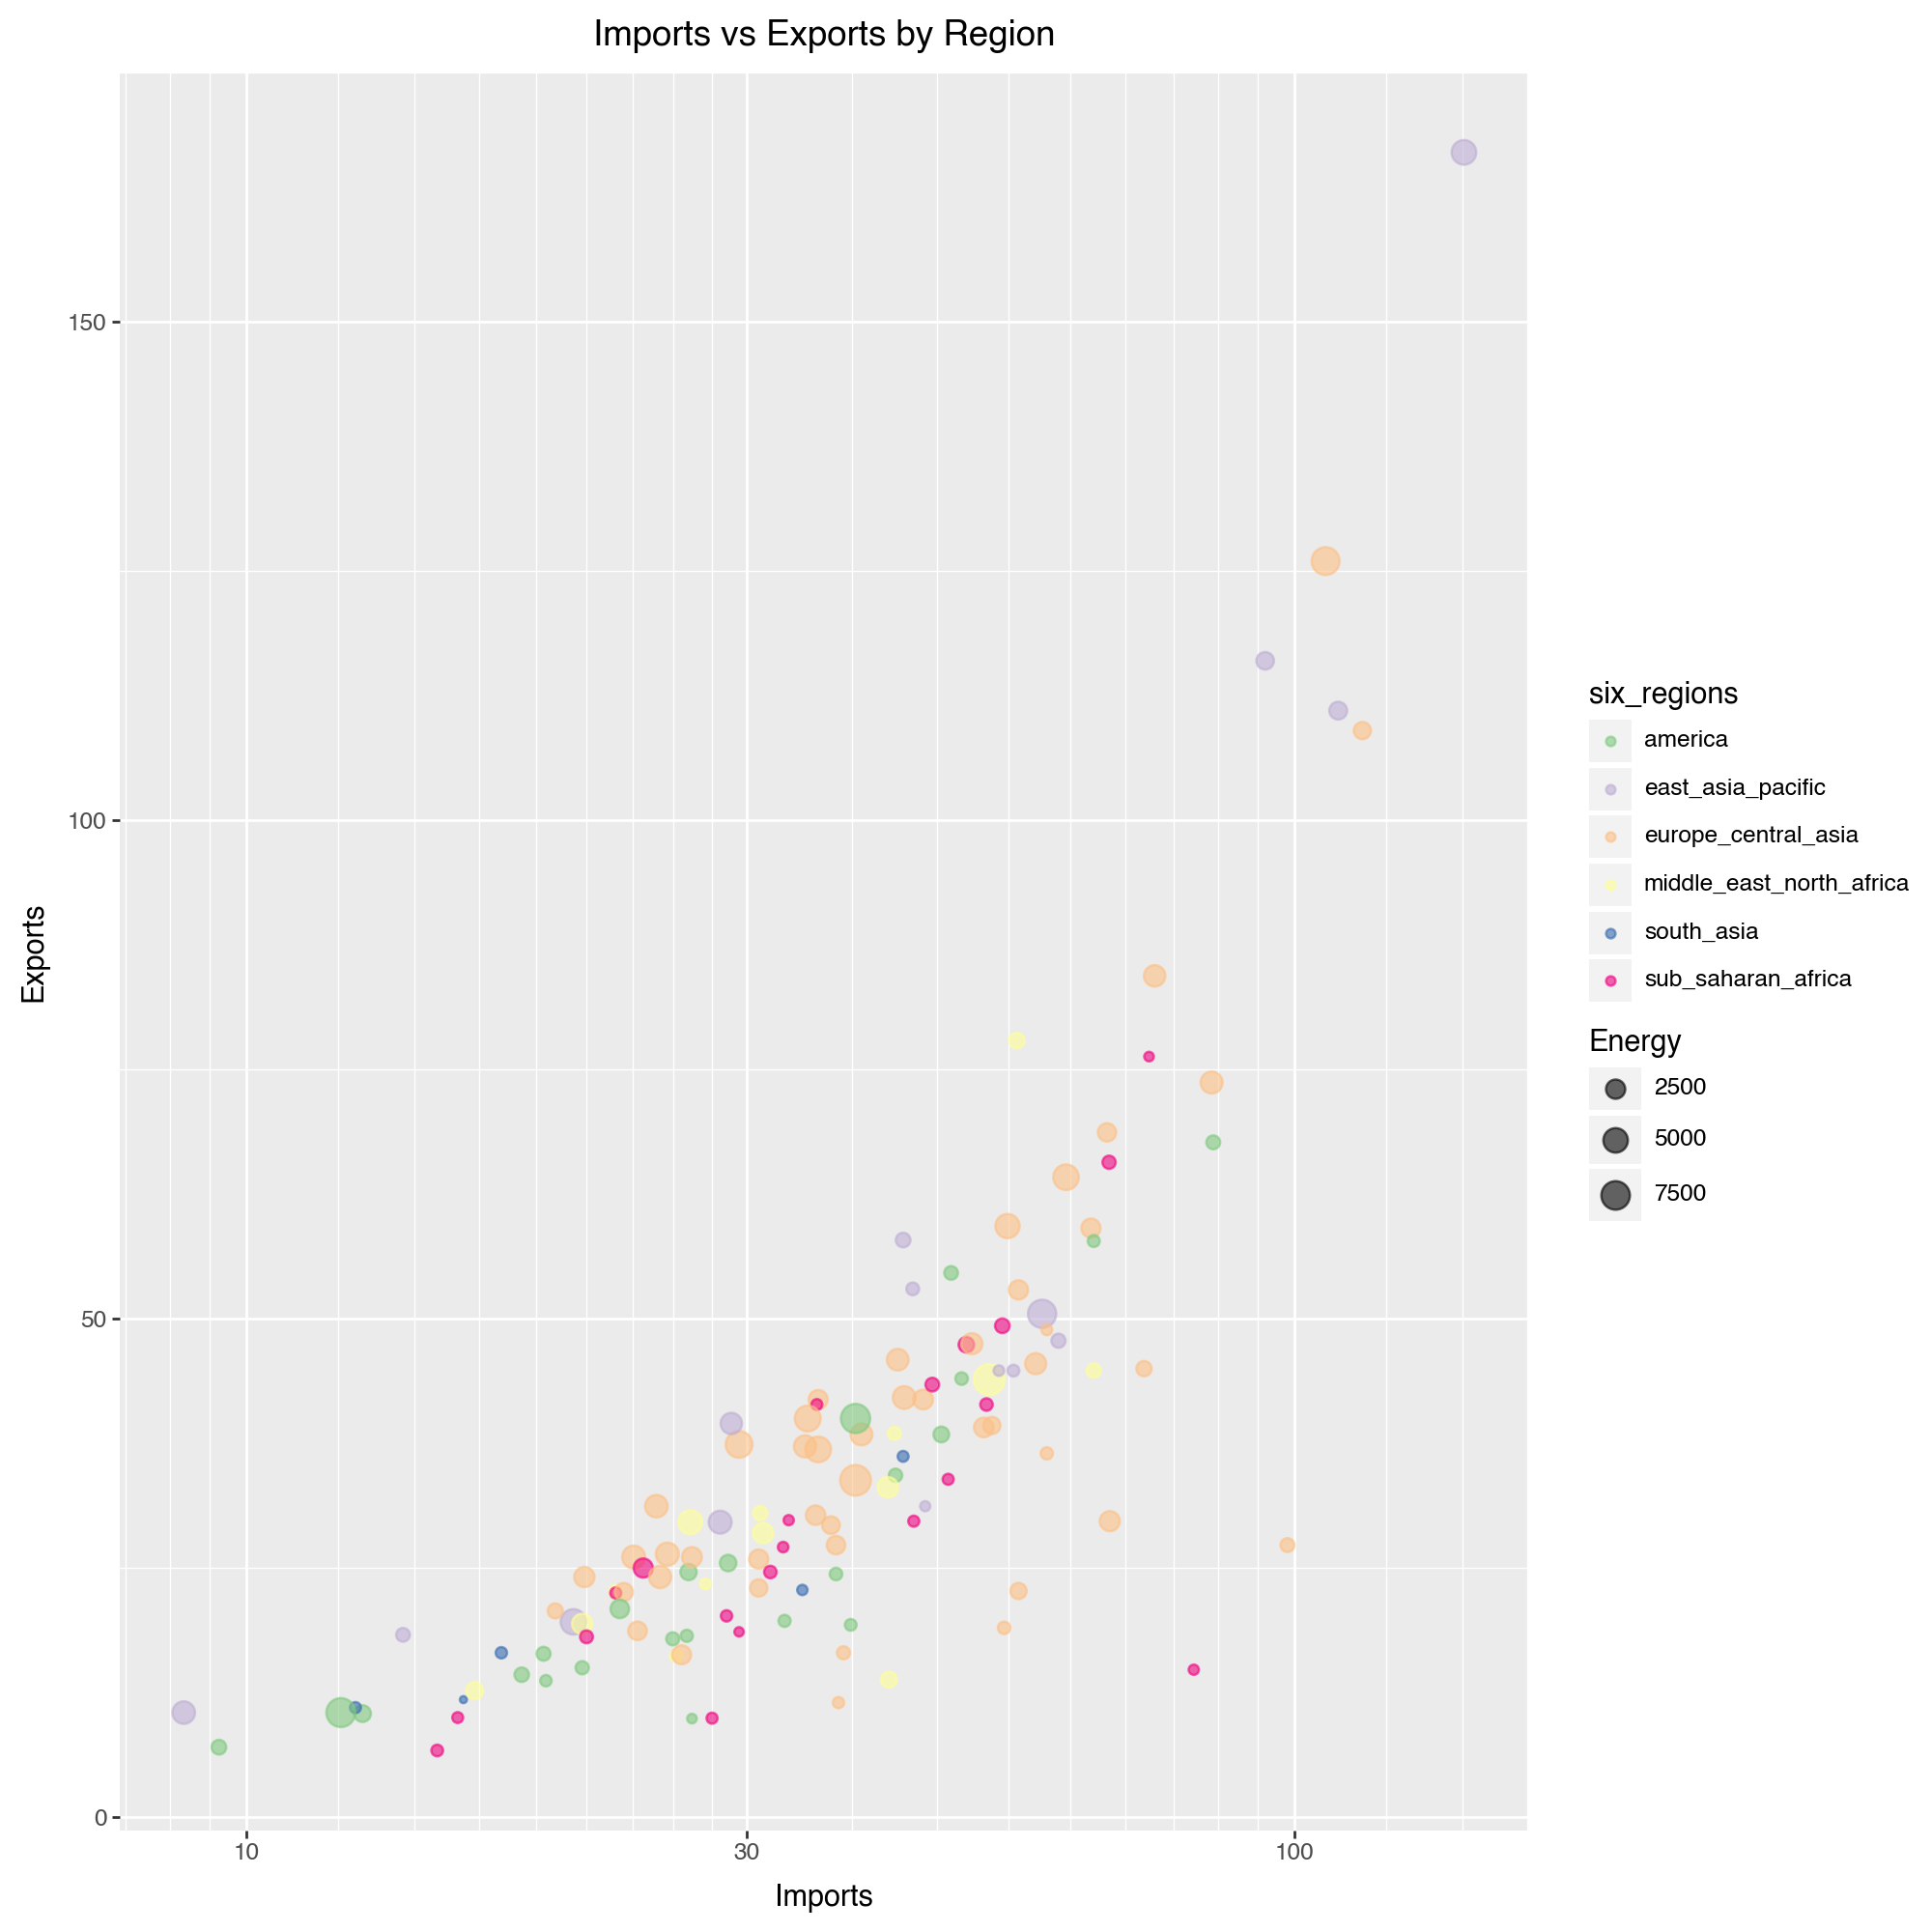

In [23]:
%pip install pandas plotnine seaborn matplotlib.pyplot numpy
import pandas as pd 
import plotnine as pn 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

from plotnine import ggplot, aes, geom_point, scale_x_log10, scale_color_brewer, labs, theme


q1data = pd.read_csv("/Users/anhuynh/Downloads/MSBA2024/GSB_544_Computing/lab1/Data/q1data.csv")
print(q1data.head())
print(q1data.dtypes)

q2data = pd.read_csv("/Users/anhuynh/Downloads/MSBA2024/GSB_544_Computing/lab1/Data/q2data.csv")
print(q2data.head())
print(q2data.dtypes)

q3data = pd.read_csv("/Users/anhuynh/Downloads/MSBA2024/GSB_544_Computing/lab1/Data/q3data.csv")
print(q3data.head())
print(q3data.dtypes)



aesthetics: bubble plot with show_legend  
variables: income, life_exp, population, yeat, country, four_regions, six_regions, eight_regions, world_bank_region 

<bound method Axes.scatter of <Axes: title={'center': 'Years'}, xlabel='income', ylabel='life expection'>>
<bound method Axes.scatter of <Axes: title={'center': 'Years'}, xlabel='income', ylabel='life expection'>>


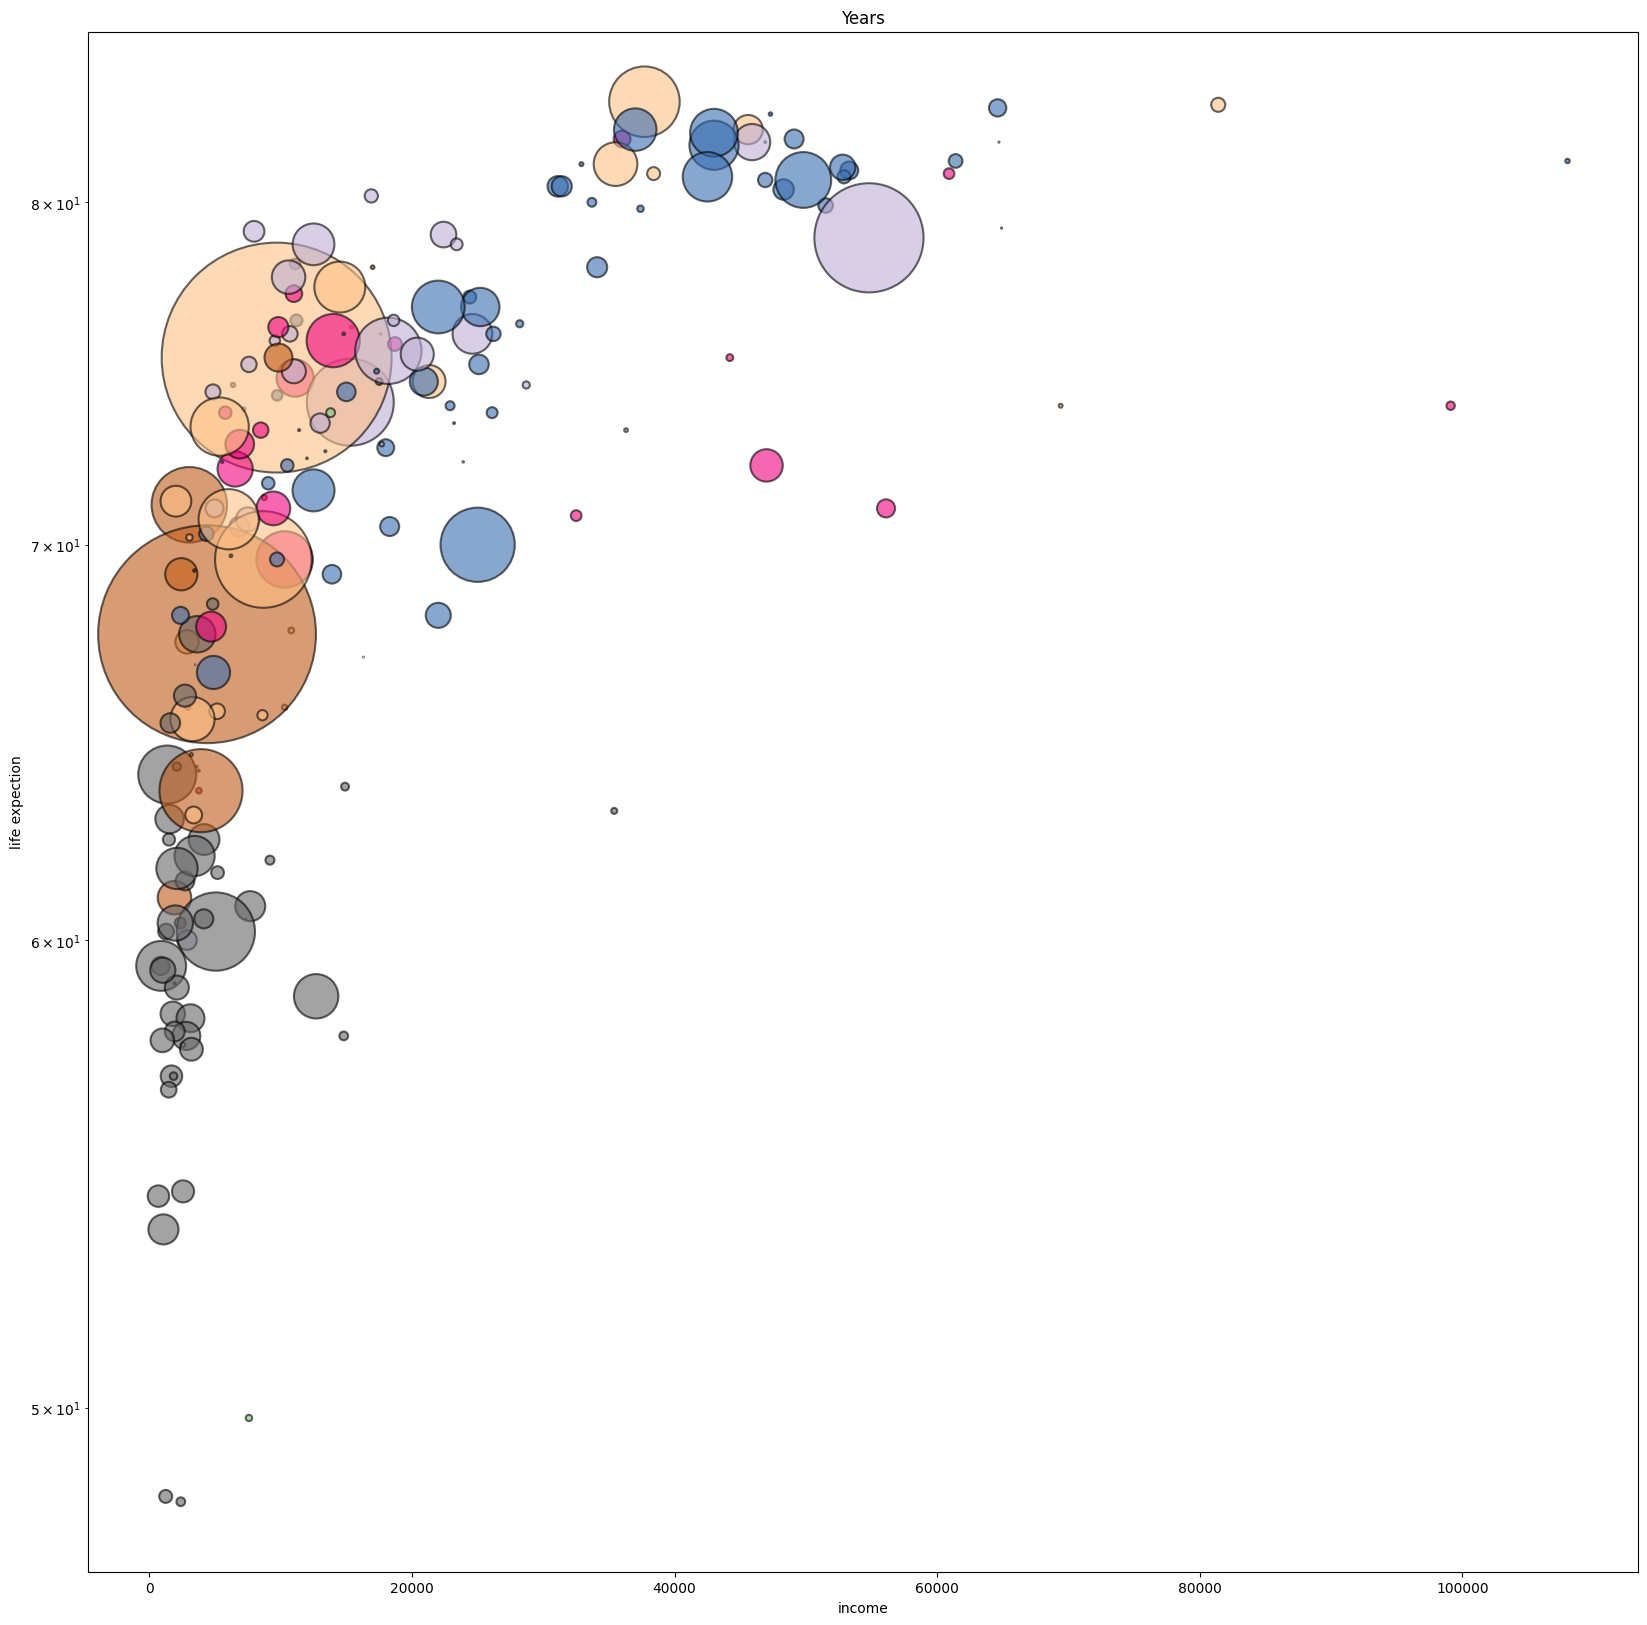

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/pprint.py:596: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/anhuynh/Library/Python/3.9/lib/python/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


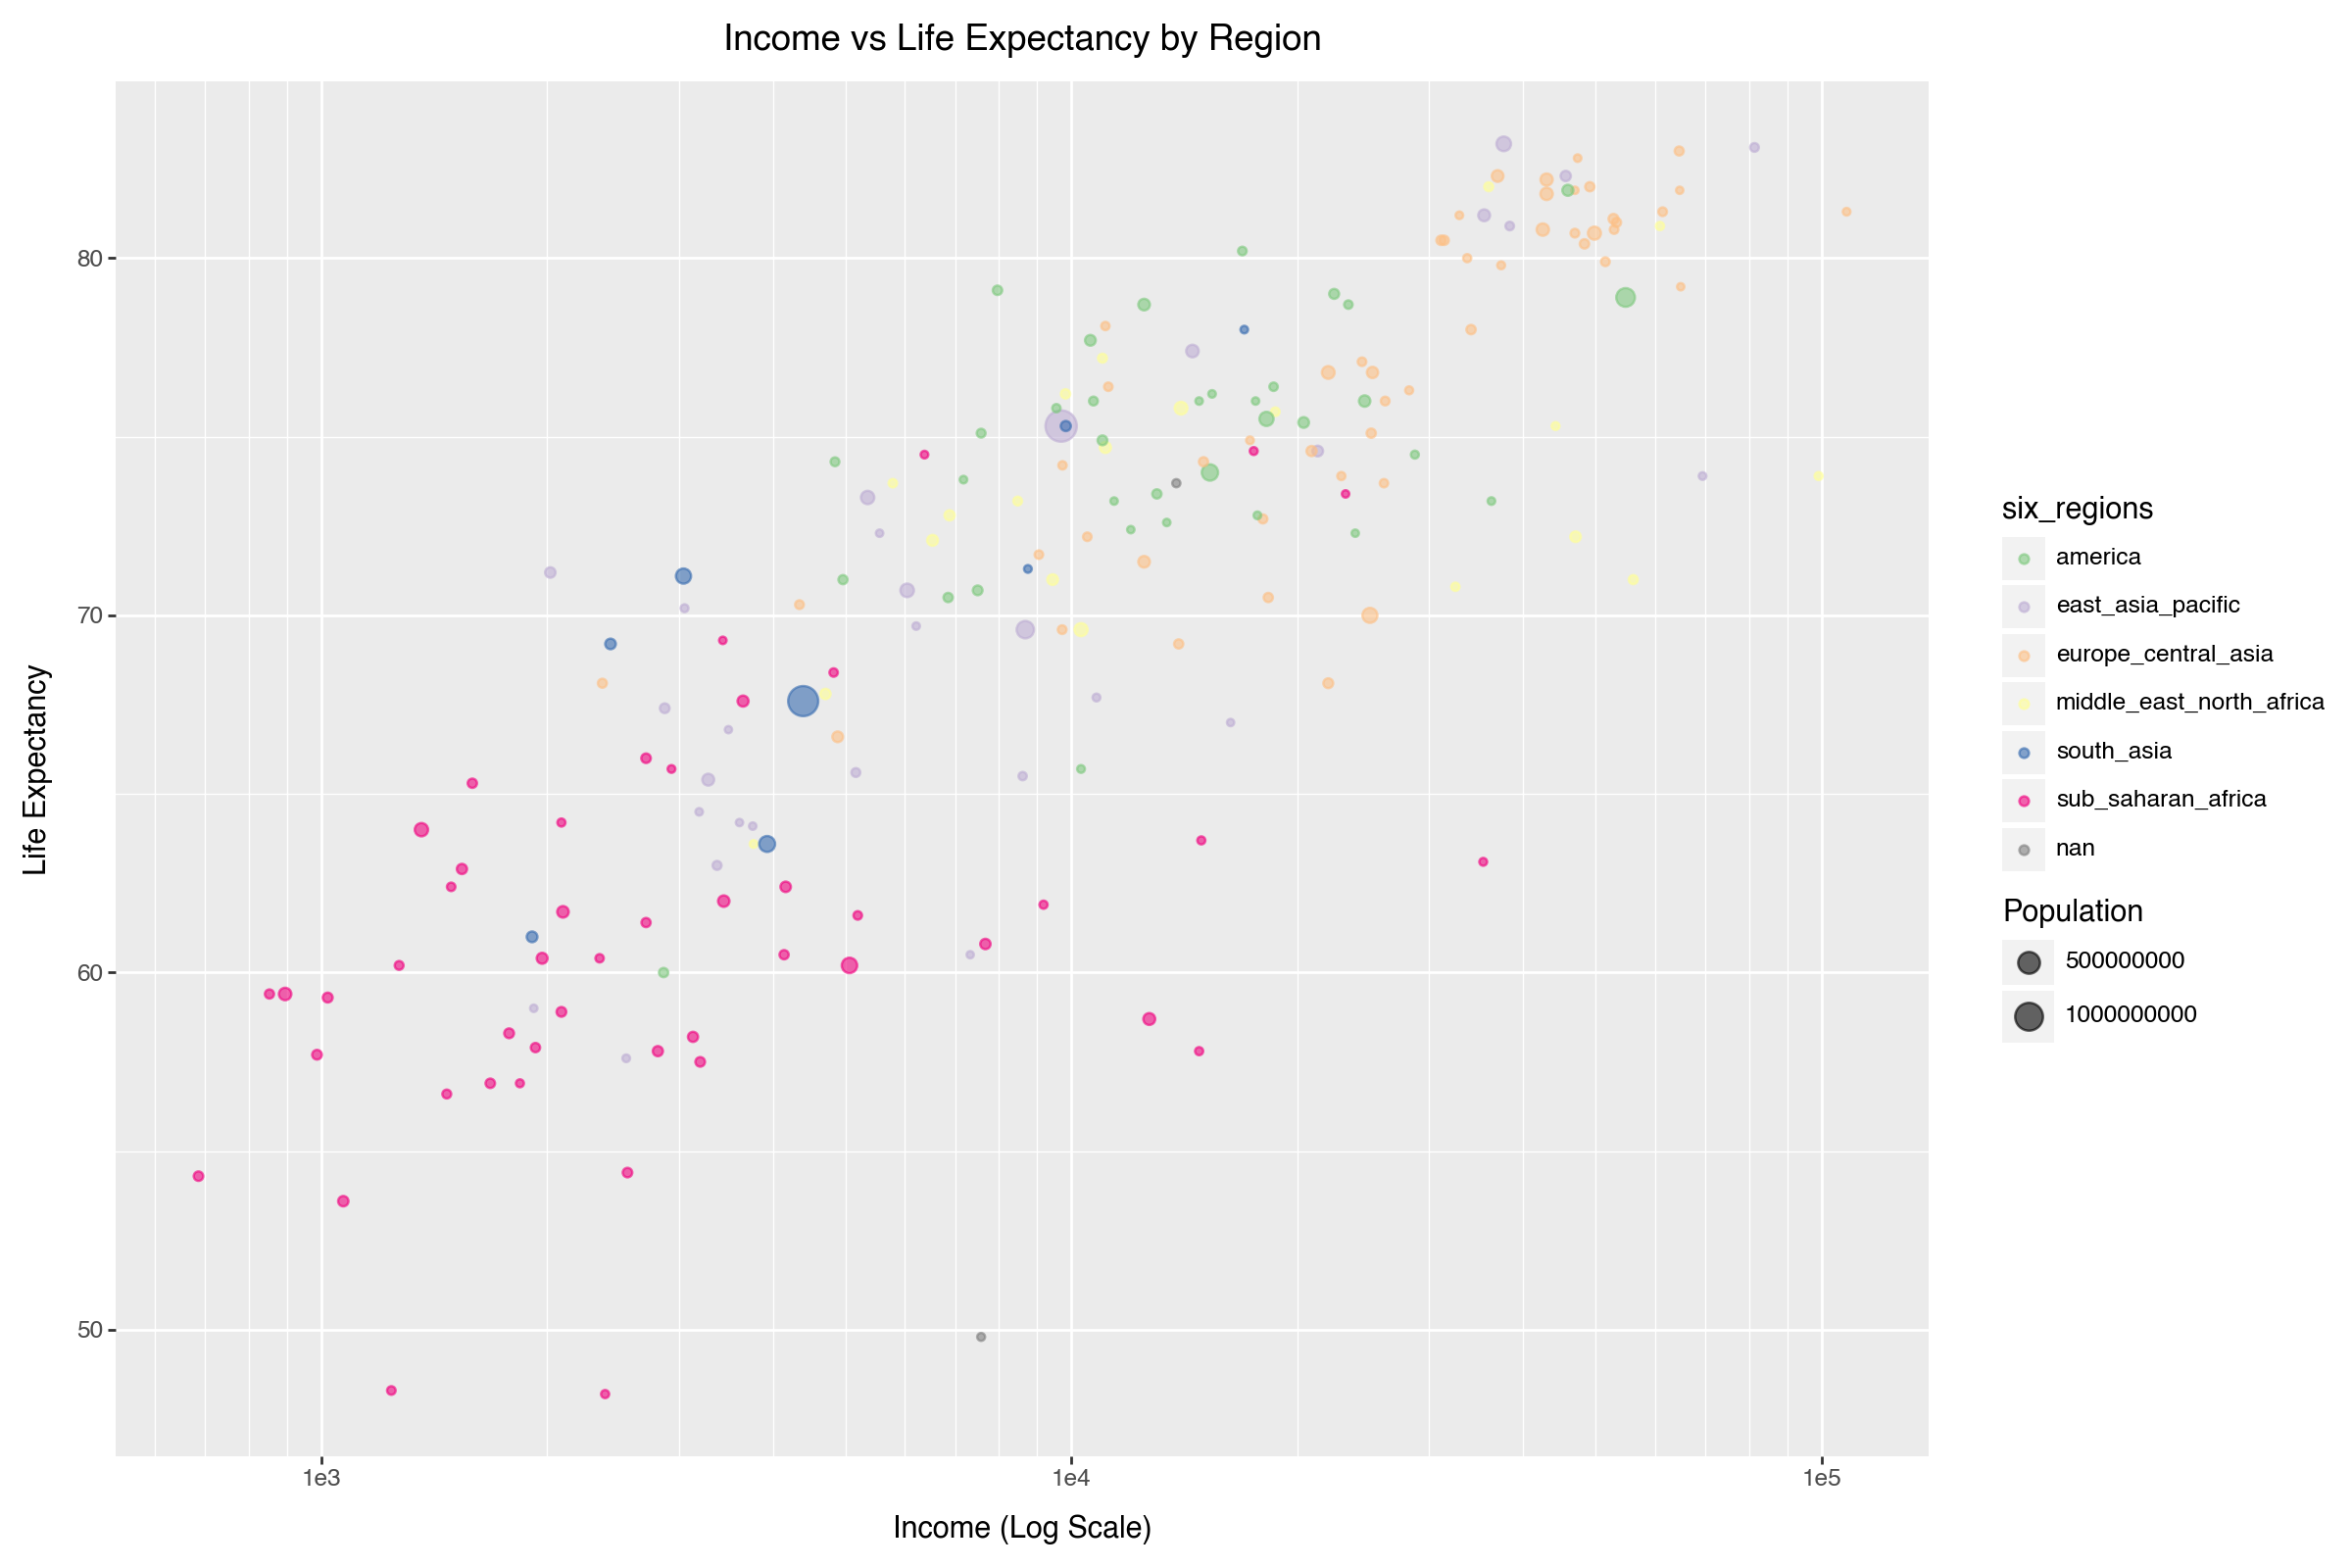

In [7]:
# Task 1

#plotnine 
# Ensure 'six_regions' is a categorical variable for color mapping
q1data['six_regions'] = q1data['six_regions'].astype('category')

# Create the bubble chart using plotnine
bubble_chart = (
    ggplot(q1data, aes(x='income', y='life_exp', size='population', color='six_regions')) +
    geom_point(alpha=0.6, shape='o') +  # Add transparency to bubbles
    scale_x_log10() +  # Apply a logarithmic scale to the x-axis
    scale_color_brewer(type='qual', palette='Accent') +  # Color palette for categorical values
    labs(
        title='Income vs Life Expectancy by Region',
        x='Income (Log Scale)',
        y='Life Expectancy',
        size='Population'
    ) +
    theme(figure_size=(12, 8))  # Set the figure size
)

plt.show()


#Question 4 
fig, ax = plt.subplots(figsize=(20, 20))

q1data['six_regions'] = q1data['six_regions'].astype('category')

# Scatterplot
ax.scatter(
    x = q1data['income'], 
    y = q1data['life_exp'], 
    s = q1data['population']/50000, 
    c = q1data['six_regions'].cat.codes, 
    cmap = "Accent", 
    alpha = 0.6, 
    edgecolors = "black", 
    linewidth = 1.5
)


# Add titles (main and on axis)
plt.yscale('log')
ax.set_xlabel("income")
ax.set_ylabel("life expection")
ax.set_title("Year 2010")


print(ax.scatter)

<bound method Axes.scatter of <Axes: title={'center': 'Year 1917'}, xlabel='imports', ylabel='exports'>>
<bound method Axes.scatter of <Axes: title={'center': 'Year 1917'}, xlabel='imports', ylabel='exports'>>


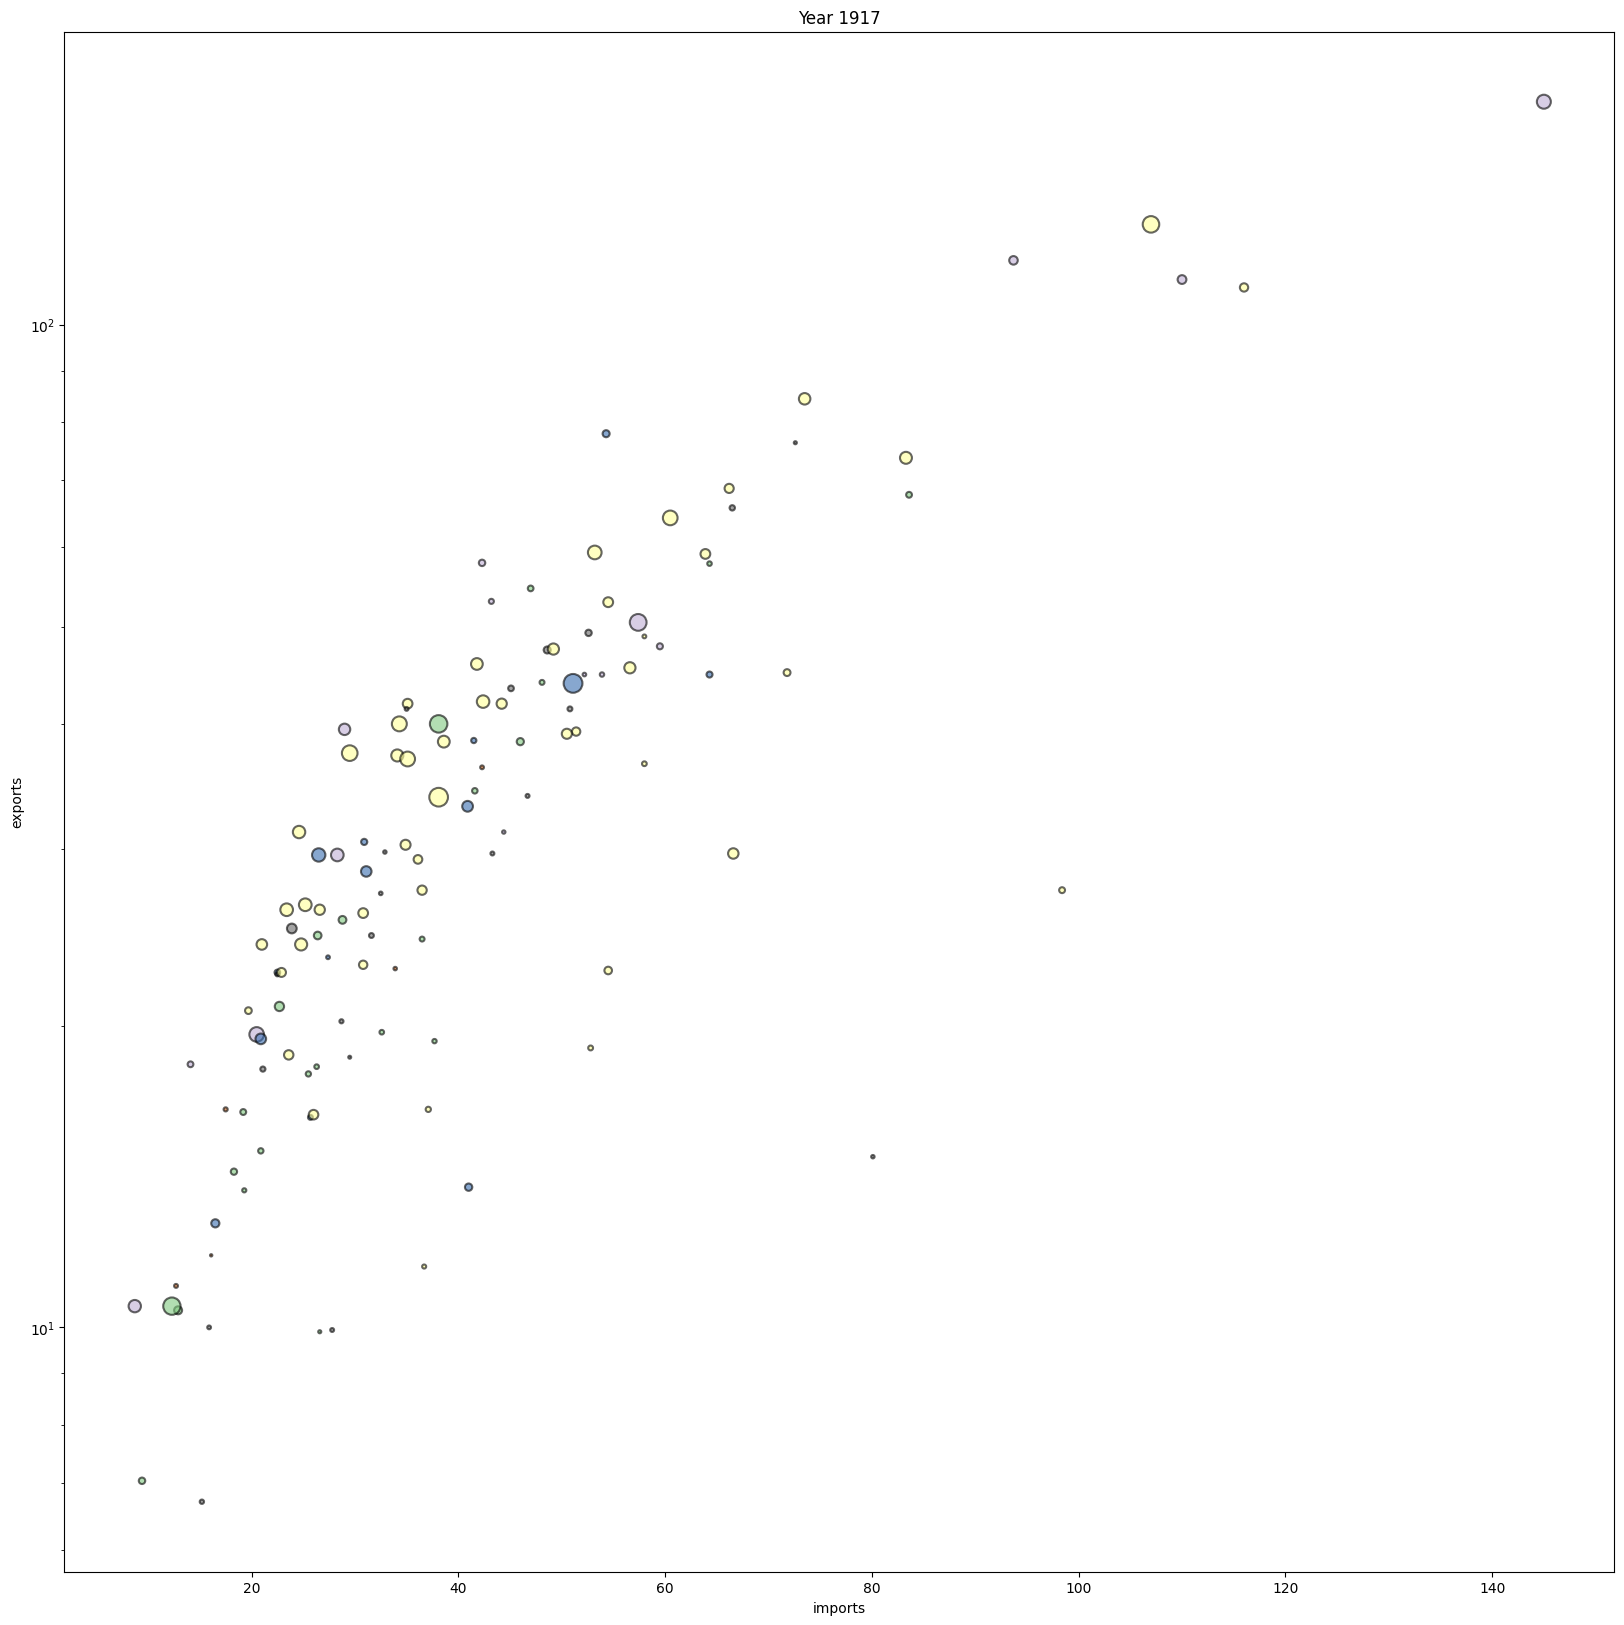

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/pprint.py:596: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


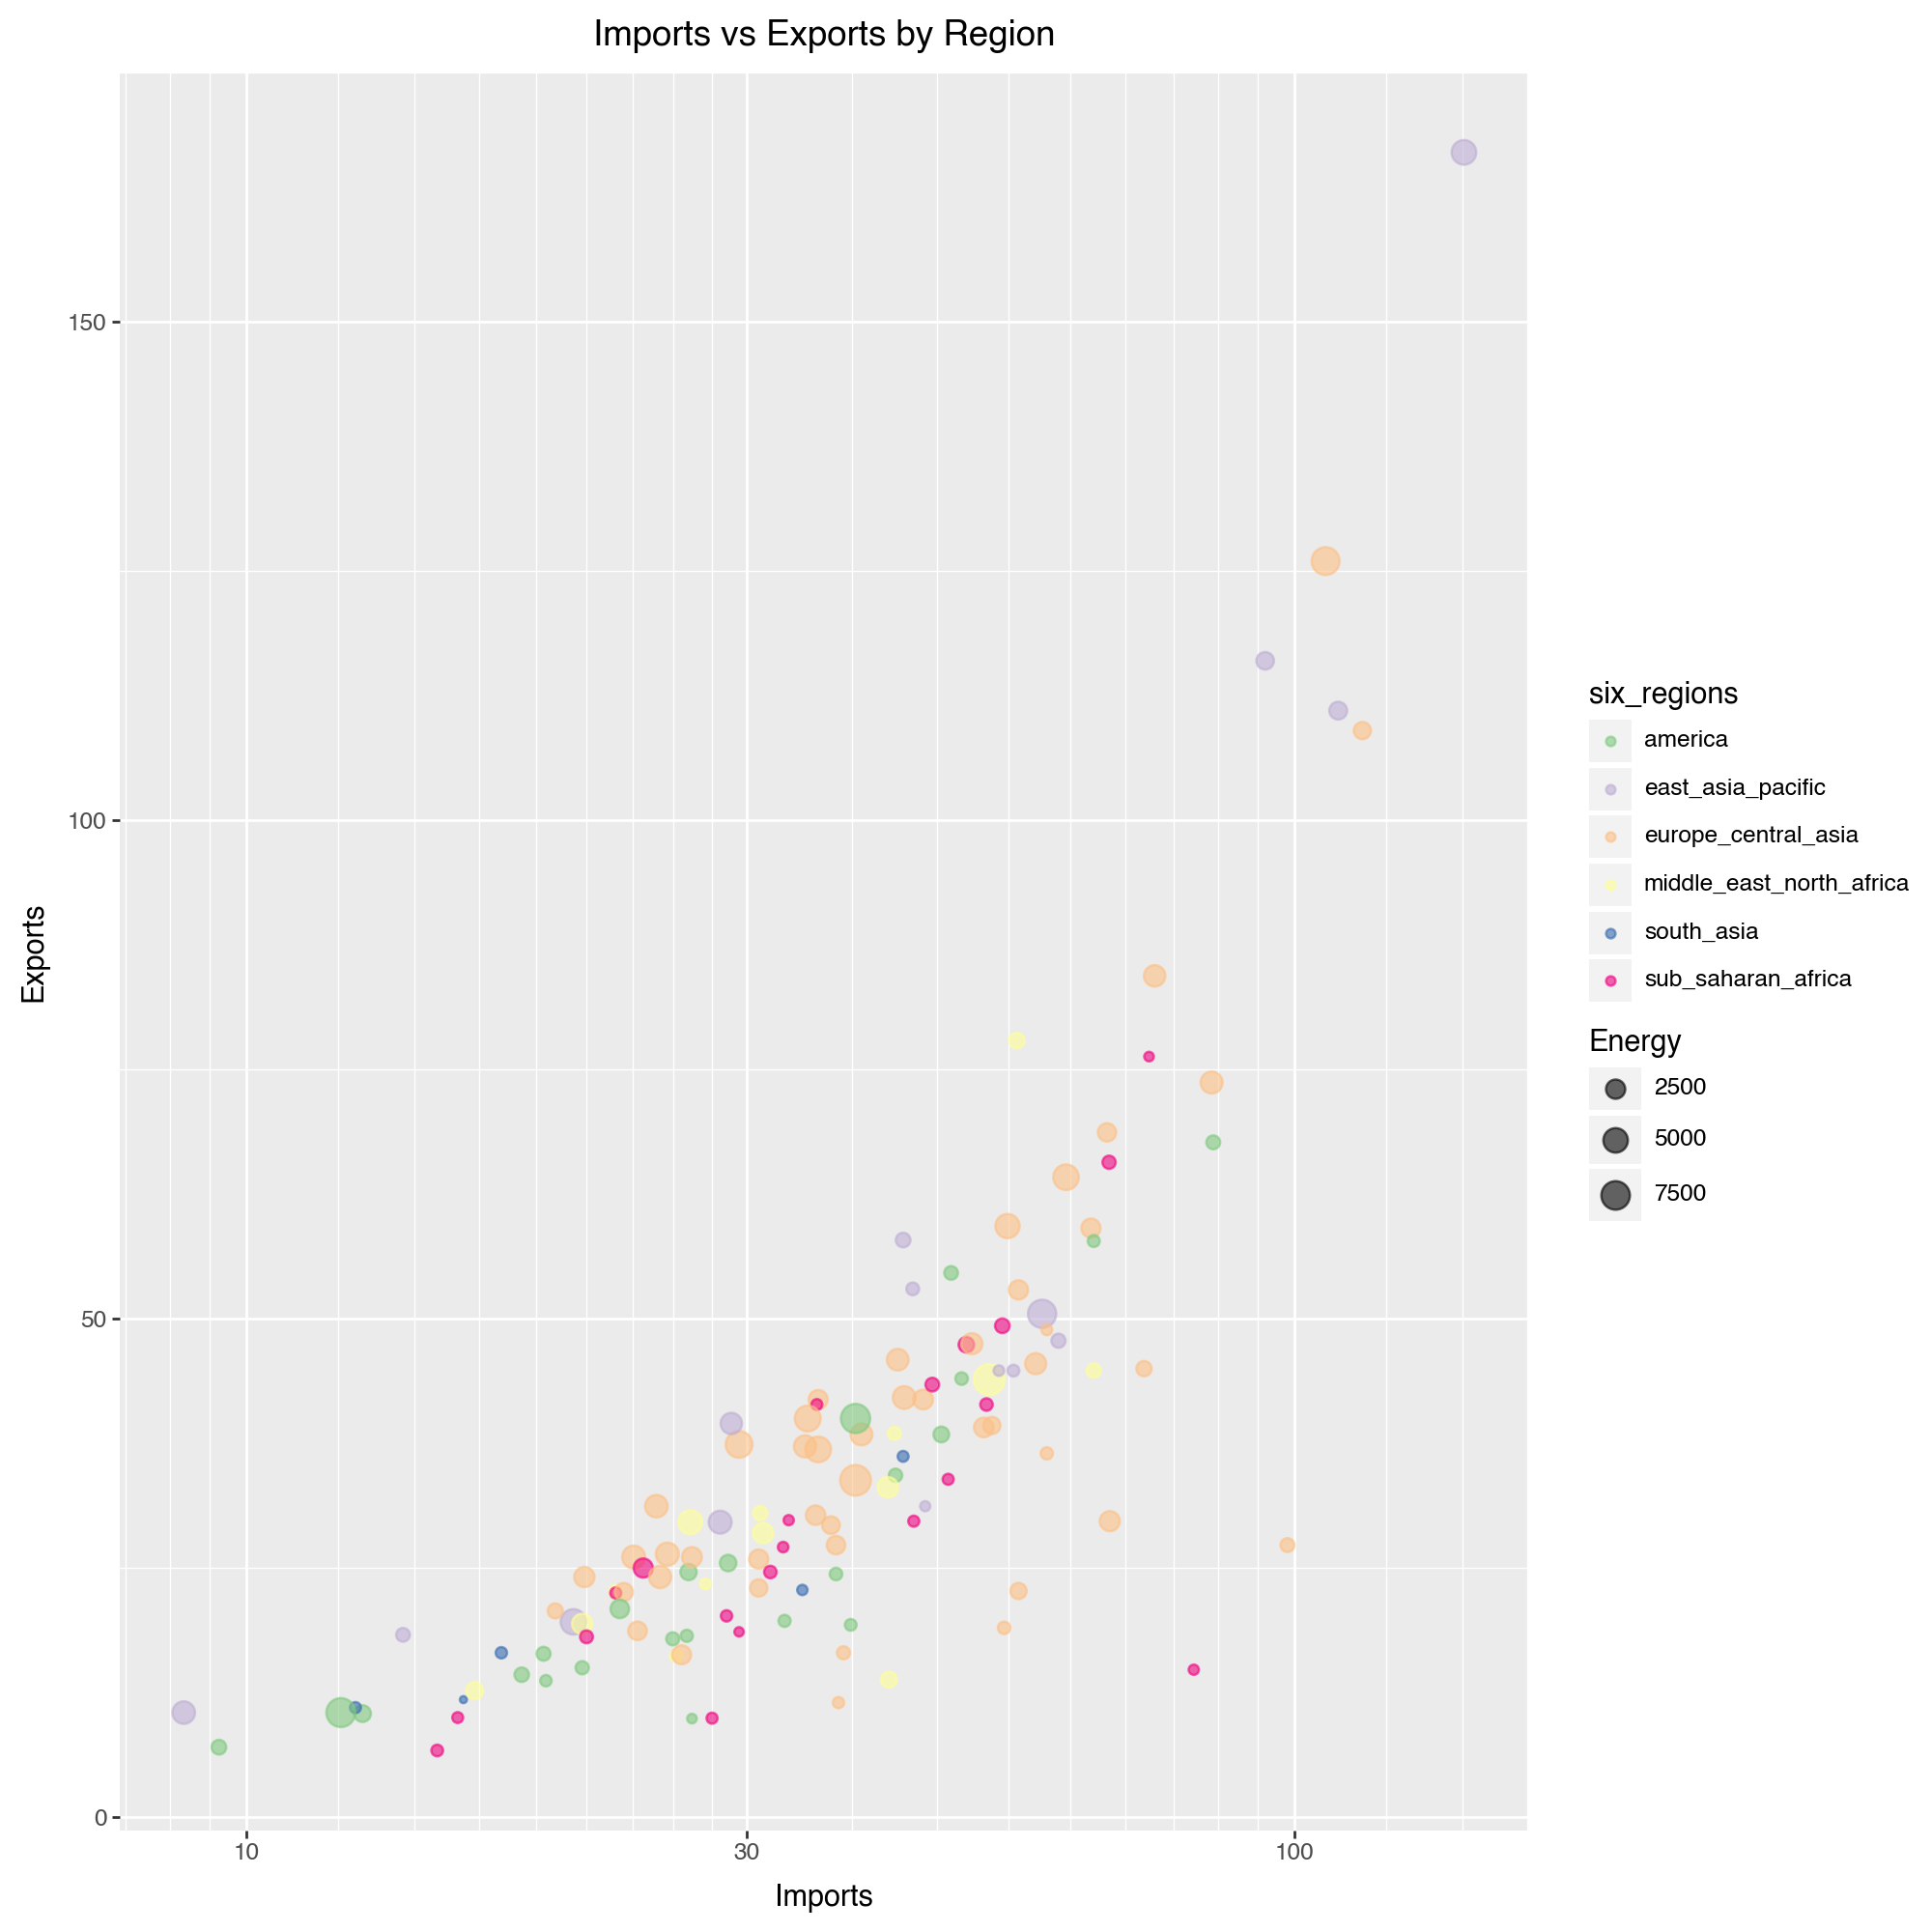

In [25]:
#Task 2

#plotnine graph 

# Convert columns to numeric, coercing errors to NaN
q2data['energy'] = pd.to_numeric(q2data['energy'], errors='coerce')
q2data['imports'] = pd.to_numeric(q2data['imports'], errors='coerce')
q2data['exports'] = pd.to_numeric(q2data['exports'], errors='coerce')

q2data_cleaned = q2data.dropna()


# Create the bubble chart using plotnine
bubble_chart = (
    ggplot(q2data_cleaned, aes(x='imports', y='exports', size='energy', color='six_regions')) +
    geom_point(alpha=0.6, shape='o') +  # Add transparency to bubbles
    scale_x_log10() +  # Apply a logarithmic scale to the x-axis
    scale_color_brewer(type='qual', palette='Accent') +  # Color palette for categorical values
    labs(
        title='Imports vs Exports by Region',
        x='Imports',
        y='Exports',
        size='Energy'
    ) +
    theme(figure_size=(10, 10))  # Set the figure size
)

plt.show()

# question 4 
fig, ax = plt.subplots(figsize=(20, 20))

q2data['six_regions'] = q2data['six_regions'].astype('category')

# Scatterplot
ax.scatter(
    x = q2data_cleaned['imports'], 
    y = q2data_cleaned['exports'], 
    s = q2data_cleaned['energy']/50, 
    c = q2data_cleaned['six_regions'].cat.codes, 
    cmap = "Accent", 
    alpha = 0.6, 
    edgecolors = "black", 
    linewidth = 1.5
)


# Add titles (main and on axis)
plt.yscale('log')
ax.set_xlabel("imports")
ax.set_ylabel("exports")
ax.set_title("Year 1917")


print(ax.scatter)


<bound method Axes.scatter of <Axes: title={'center': 'Year 2001'}, xlabel='imports', ylabel='exports'>>
<bound method Axes.scatter of <Axes: title={'center': 'Year 2001'}, xlabel='imports', ylabel='exports'>>


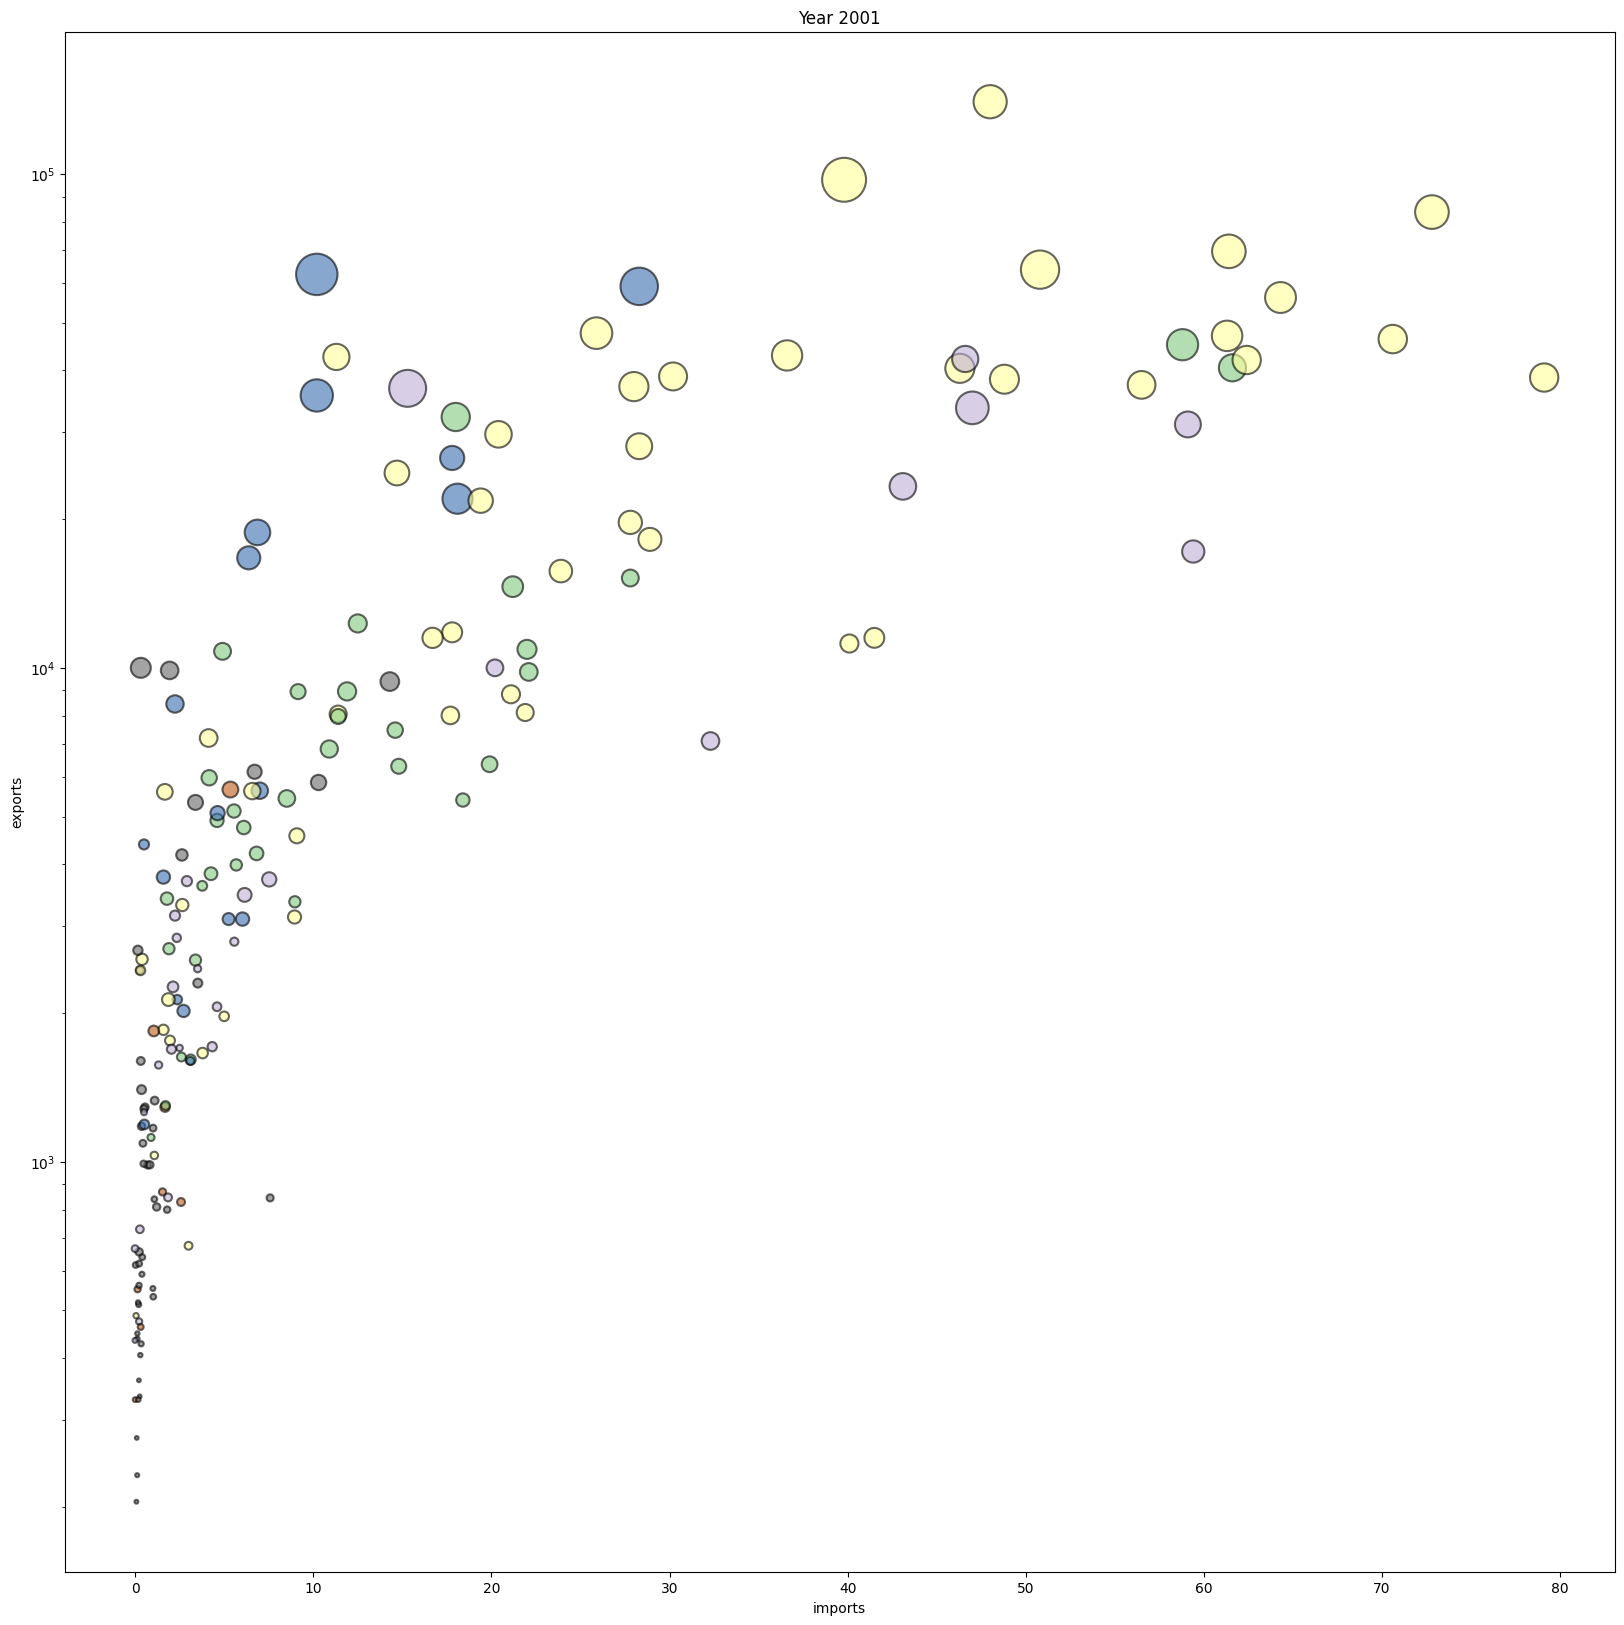

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/pprint.py:596: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/anhuynh/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


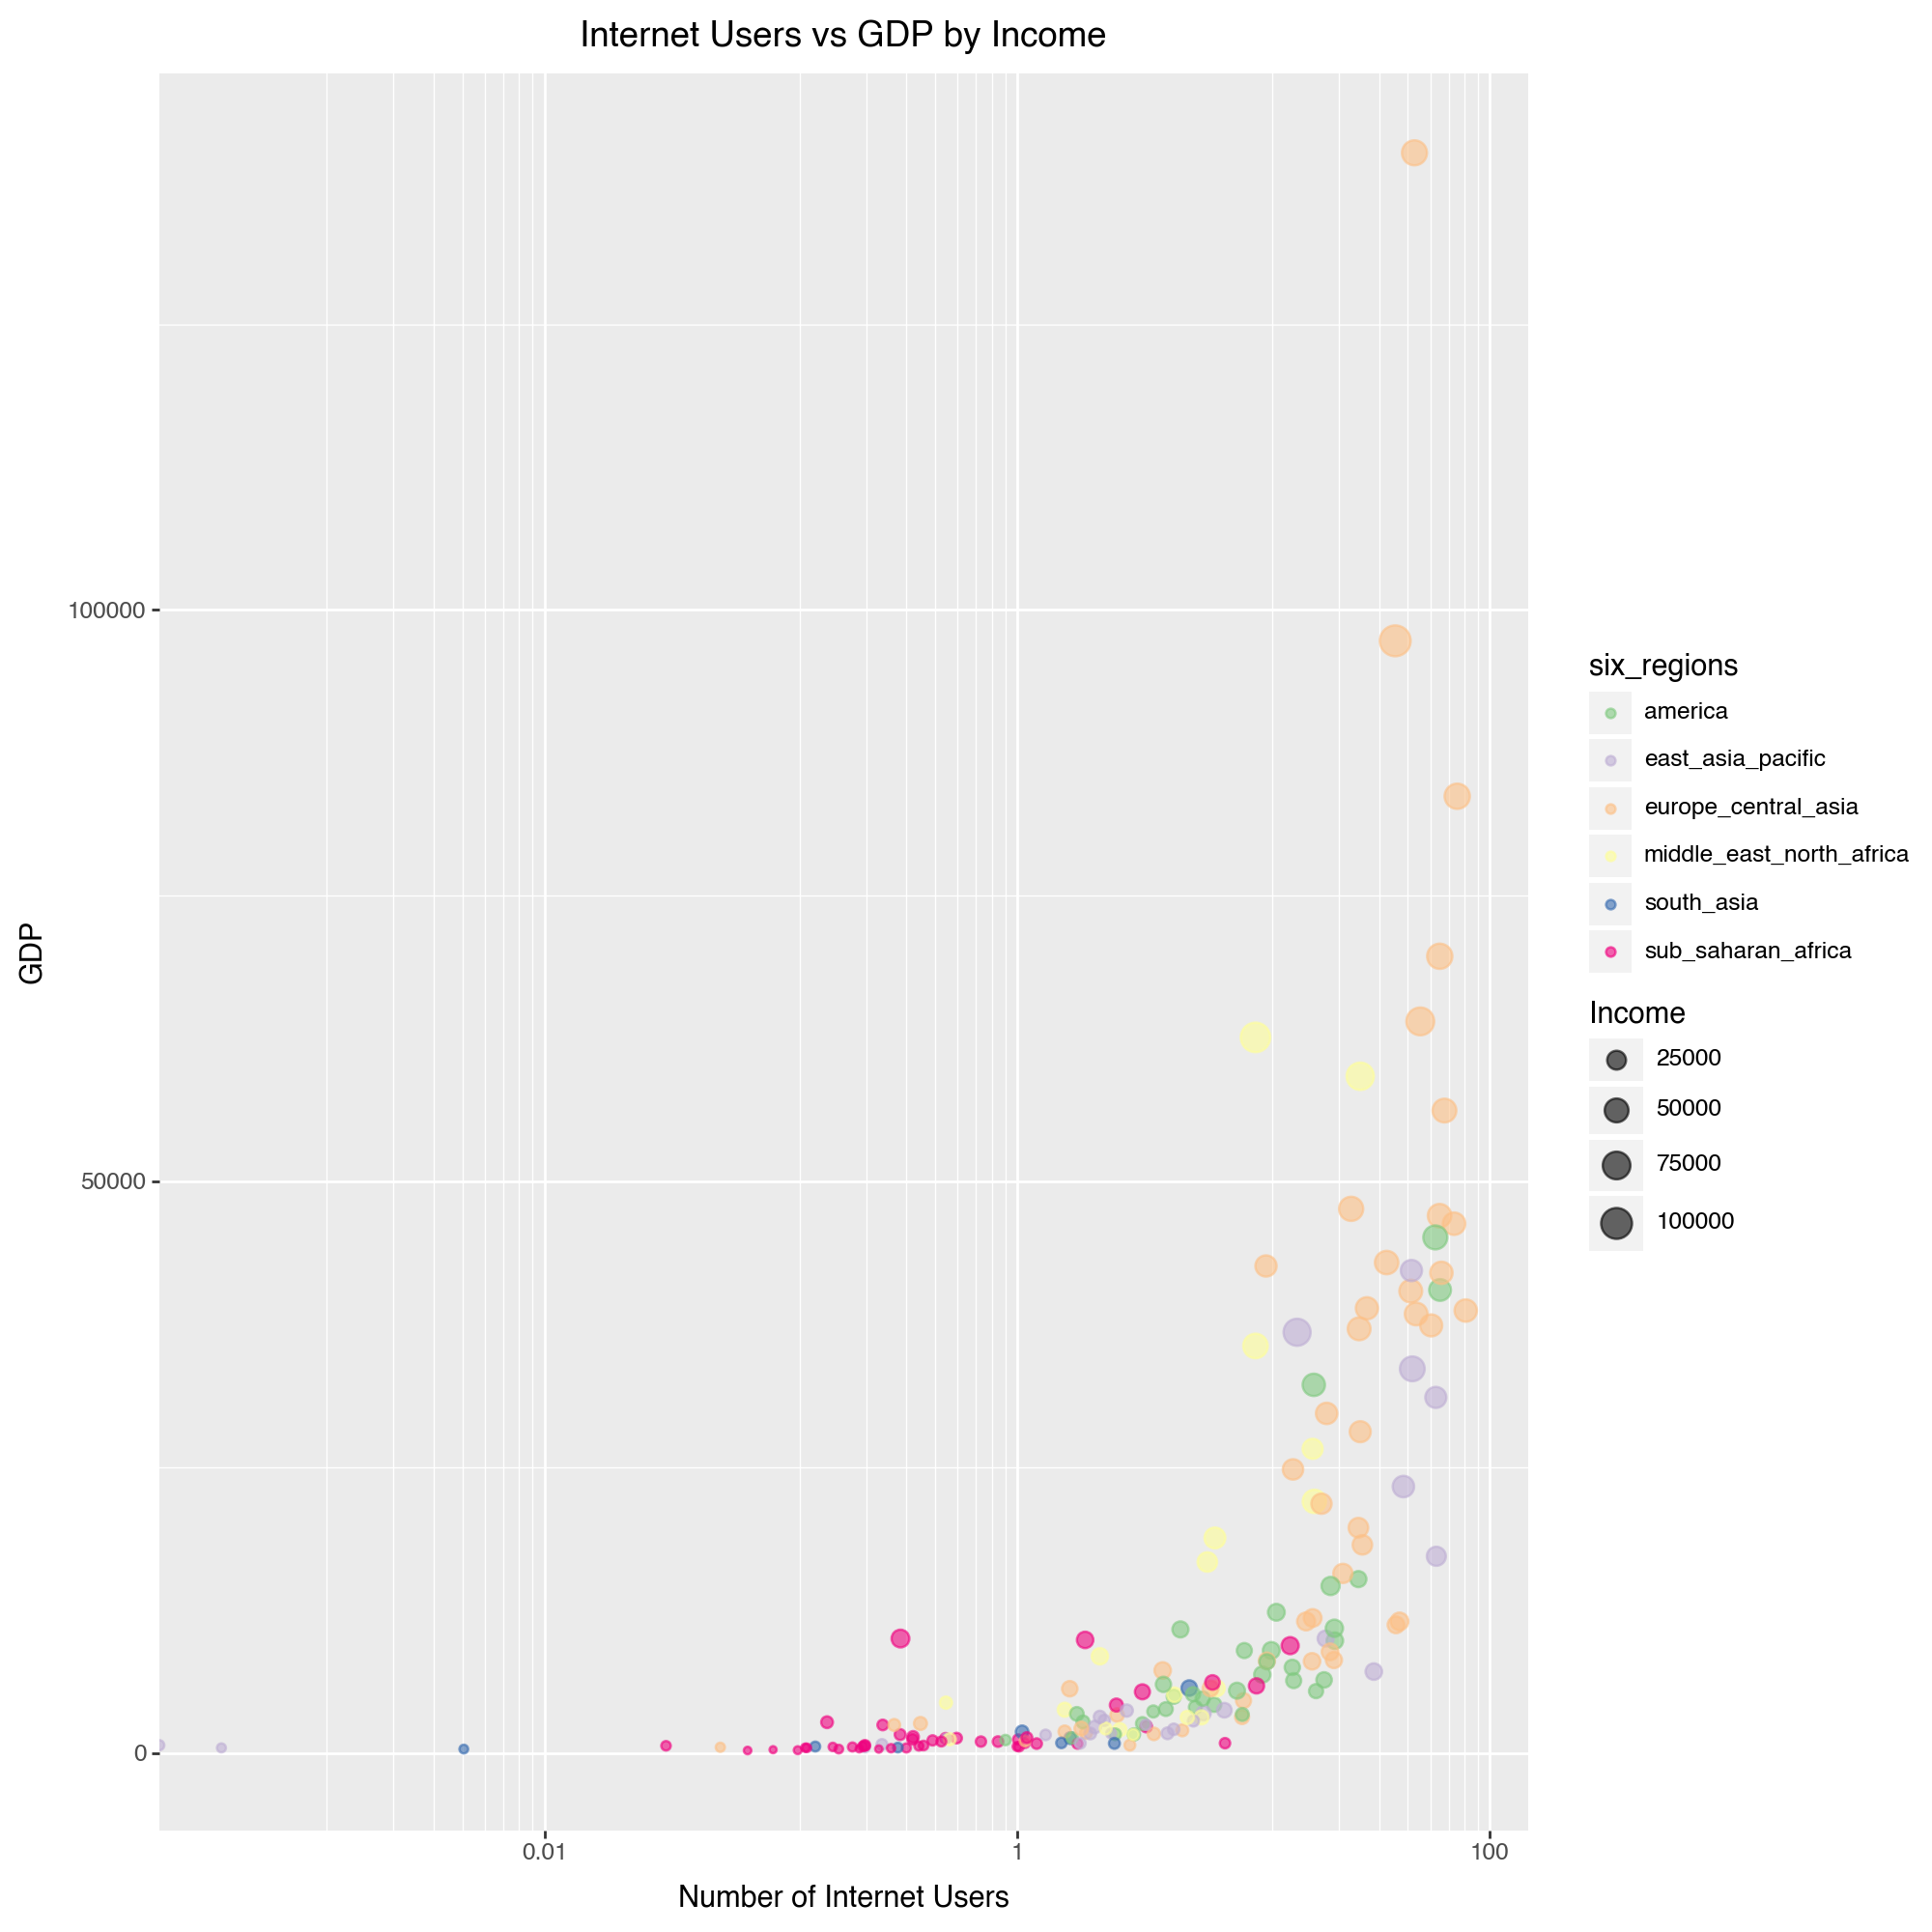

In [28]:
#Task 3

#plotnine graph 


q3data_cleaned = q3data.dropna()
q3data['six_regions'] = q3data['six_regions'].astype('category')


# Create the bubble chart using plotnine
bubble_chart = (
    ggplot(q3data_cleaned, aes(x='internet_users', y='gdp', size='income', color='six_regions')) +
    geom_point(alpha=0.6, shape='o') +  # Add transparency to bubbles
    scale_x_log10() +  # Apply a logarithmic scale to the x-axis
    scale_color_brewer(type='qual', palette='Accent') +  # Color palette for categorical values
    labs(
        title='Internet Users vs GDP by Income',
        x='Number of Internet Users',
        y='GDP',
        size='Income'
    ) +
    theme(figure_size=(10, 10))  # Set the figure size
)

plt.show()

# question 4 
fig, ax = plt.subplots(figsize=(20, 20))


# Scatterplot
ax.scatter(
    x = q3data_cleaned['internet_users'], 
    y = q3data_cleaned['gdp'], 
    s = q3data_cleaned['income']/100, 
    c = q3data_cleaned['six_regions'].cat.codes, 
    cmap = "Accent", 
    alpha = 0.6, 
    edgecolors = "black", 
    linewidth = 1.5
)


# Add titles (main and on axis)
plt.yscale('log')
ax.set_xlabel("imports")
ax.set_ylabel("exports")
ax.set_title("Year 2001")


print(ax.scatter)